In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import matplotlib.pyplot as plt

import requests
import pandas as pd
import datetime

import sys
import scenario_generator.utils as u
from mechafil.data import query_starboard_sector_expirations

In [2]:
end_date = datetime.date(2023, 1, 1)
start_date = end_date - datetime.timedelta(days=180)
starboard_expirations_df = query_starboard_sector_expirations(start_date, end_date)

In [3]:
historical_t_offline, historical_expirations_offline = u.get_historical_expirations(start_date, end_date)
historical_t_online, historical_expirations_online = u.get_historical_expirations_online(start_date, end_date)

<IPython.core.display.Javascript object>


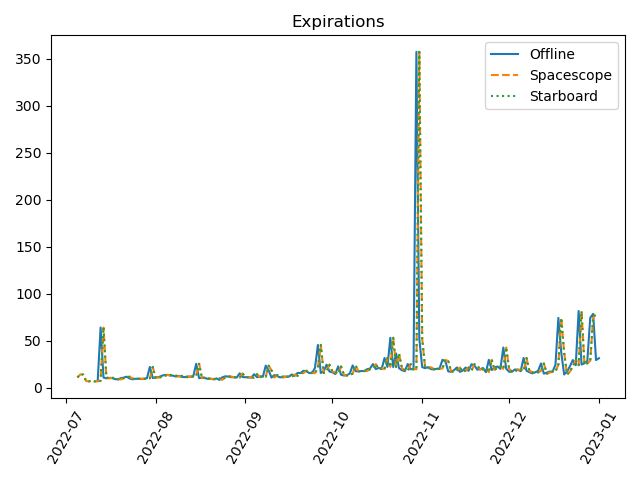

In [4]:
plt.figure()
plt.plot(historical_t_offline, historical_expirations_offline, label='Offline')

plt.plot(historical_t_online, historical_expirations_online, linestyle='--', label='Spacescope')
plt.plot(starboard_expirations_df['date'], starboard_expirations_df['expired_rb'], linestyle=':', label='Starboard')
plt.xticks(rotation=60)
plt.title('Expirations')
plt.legend()
plt.tight_layout()

In [5]:
historical_t_offline, historical_extensions_offline = u.get_historical_extensions(start_date, end_date)
historical_t_online, historical_extensions_online = u.get_historical_extensions_online(start_date, end_date)

<IPython.core.display.Javascript object>


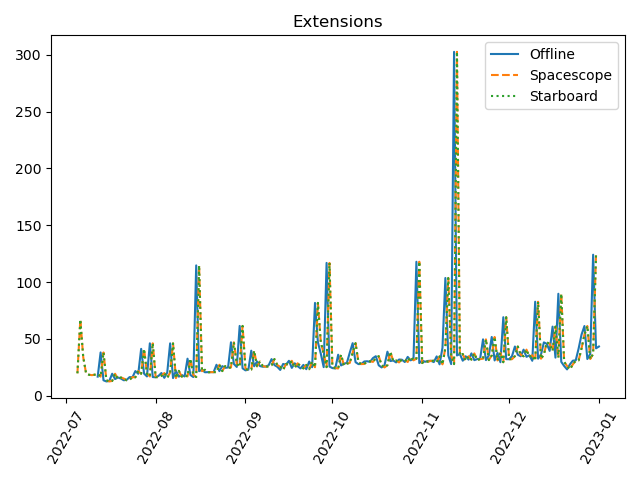

In [6]:
plt.figure()
plt.plot(historical_t_offline, historical_extensions_offline, label='Offline')

plt.plot(historical_t_online, historical_extensions_online, label='Spacescope', linestyle='--')
plt.plot(starboard_expirations_df['date'], starboard_expirations_df['extended_rb'], linestyle=':', label='Starboard')

plt.xticks(rotation=60)
plt.title('Extensions')
plt.legend()
plt.tight_layout()

In [7]:
# compare historical deals onboarded
historical_t_offline, historical_deals_onboard_offline = u.get_historical_deals_onboard(start_date, end_date)
historical_t_online, historical_deals_onboard_online = u.get_historical_deals_onboard_online(start_date, end_date)

<IPython.core.display.Javascript object>


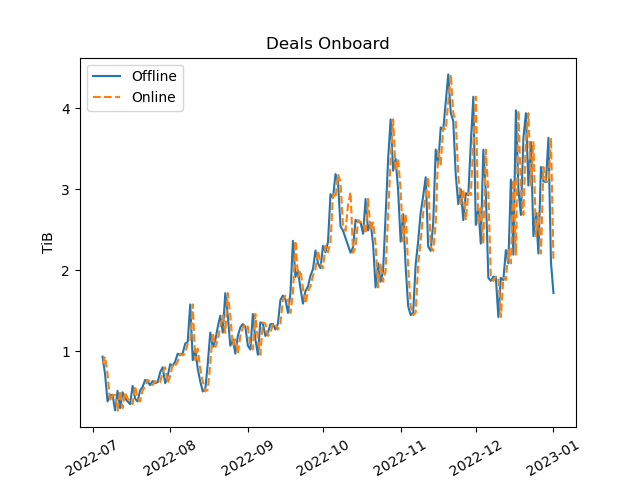

In [8]:
plt.figure()
plt.plot(historical_t_offline, historical_deals_onboard_offline, label='Offline')
plt.plot(historical_t_online, historical_deals_onboard_online, label='Online', linestyle='--')

plt.xticks(rotation=30)
plt.title('Deals Onboard')
plt.ylabel('TiB')
plt.legend()